# TITANIC DATASET SURVIVAL PREDICTION

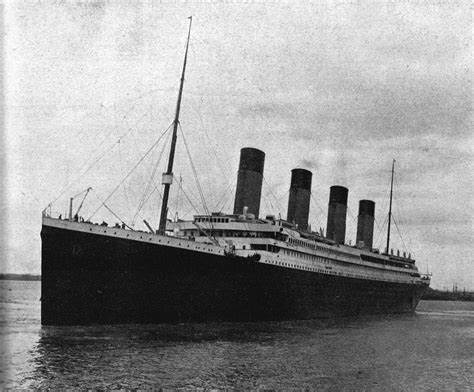

# Import Libraries

In [1]:
# pandas for data manipulation.
import pandas as pd

# numpy for numerical operations.
import numpy as np

# Import the display module from IPython
from IPython.display import display

# RandomForestClassifier for building the model.
from sklearn.ensemble import RandomForestClassifier as rfc

# train_test_split for splitting the dataset into training and testing sets.
from sklearn.model_selection import train_test_split as tts

# accuracy_score for evaluating the model's accuracy.
from sklearn.metrics import accuracy_score as acc_score

# Load Titanic Dataset

In [2]:
# Load the dataset with error handling
try:
    titanic_data = pd.read_csv('Titanic-Dataset.csv')
except FileNotFoundError:
    print("File not found. Please check the file path.")

# Information About The Dataset

In [3]:
# information about the dataset
display(titanic_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


None

In [4]:
# Display the first rows of the dataset in a table format
display(titanic_data.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Missing Values

In [5]:
# Check for any missing values
display(titanic_data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Replace Missing Values

In [6]:
# Handle missing values
titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)

# Numerical Representations

In [7]:
# Encode categorical variables
titanic_data['Sex'] = titanic_data['Sex'].map({'female': 0, 'male': 1})
titanic_data['Embarked'] = titanic_data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

In [8]:
# Select relevant features for the model
x = titanic_data[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex', 'Embarked']]
y = titanic_data['Survived']
display(x,y)

,Pclass,Age,SibSp,Parch,Fare,Sex,Embarked
0,3,22.0,1,0,7.2500,1,0
1,1,38.0,1,0,71.2833,0,1
2,3,26.0,0,0,7.9250,0,0
3,1,35.0,1,0,53.1000,0,0
4,3,35.0,0,0,8.0500,1,0
...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,1,0
887,1,19.0,0,0,30.0000,0,0
888,3,28.0,1,2,23.4500,0,0
889,1,26.0,0,0,30.0000,1,1


0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

# Training And Testing

In [9]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = tts(x, y, test_size=0.4, random_state=57)

In [10]:
# Initialize the model
model = rfc()

In [11]:
# Train the model
model.fit(x_train, y_train)

RandomForestClassifier()

# Predictions 

In [12]:
# Predict on the test set
y_pred = model.predict(x_test)
display(x_test)

,Pclass,Age,SibSp,Parch,Fare,Sex,Embarked
561,3,40.0,0,0,7.8958,1,0
713,3,29.0,0,0,9.4833,1,0
29,3,28.0,0,0,7.8958,1,0
120,2,21.0,2,0,73.5000,1,0
523,1,44.0,0,1,57.9792,0,1
...,...,...,...,...,...,...,...
346,2,40.0,0,0,13.0000,0,0
813,3,6.0,4,2,31.2750,0,0
797,3,31.0,0,0,8.6833,0,0
441,3,20.0,0,0,9.5000,1,0


#  Calculates The Accuracy

In [13]:
# Calculate accuracy
accuracy = acc_score(y_test, y_pred)
display("Accuracy:", accuracy)

'Accuracy:'

0.8123249299719888